In [ ]:
import pandas as pd
df=pd.read_csv("wfp_food_prices_ind.csv")

df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.159
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165336,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,actual,Retail,INR,104.86,1.3981
165337,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,111.52,1.4869
165338,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,actual,Retail,INR,100.0,1.3333
165339,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,vegetables and fruits,Onions,KG,actual,Retail,INR,26.38,0.3517


removing unwanted data from the 0th row

In [ ]:
df=df[1:][:]
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.159
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.986
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165336,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,actual,Retail,INR,104.86,1.3981
165337,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,111.52,1.4869
165338,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,actual,Retail,INR,100.0,1.3333
165339,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,vegetables and fruits,Onions,KG,actual,Retail,INR,26.38,0.3517


**DATA CLEANING**

I'm looking for missing values. Here let’s see how many columns will remain if we drop the records (rows) which contain the missing data values. Then I re-arrange the data frame by removing empty spaces of deleted rows.

In [ ]:

null_values=[x for x in df.columns if df[x].isnull().sum()>=1]
null_values

['admin1', 'admin2', 'latitude', 'longitude']

In [ ]:
import numpy as np
for y in null_values:
    print(y,":","{}%missing values".format(np.round(df[y].isnull().mean(),decimals=4)))  #total % of missing values

admin1 : 0.0048%missing values
admin2 : 0.0048%missing values
latitude : 0.0048%missing values
longitude : 0.0048%missing values


In [ ]:


df=df.dropna()
df.reset_index(drop=True, inplace=True)
df.shape

(164551, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164551 entries, 0 to 164550
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       164551 non-null  object
 1   admin1     164551 non-null  object
 2   admin2     164551 non-null  object
 3   market     164551 non-null  object
 4   latitude   164551 non-null  object
 5   longitude  164551 non-null  object
 6   category   164551 non-null  object
 7   commodity  164551 non-null  object
 8   unit       164551 non-null  object
 9   priceflag  164551 non-null  object
 10  pricetype  164551 non-null  object
 11  currency   164551 non-null  object
 12  price      164551 non-null  object
 13  usdprice   164551 non-null  object
dtypes: object(14)
memory usage: 17.6+ MB


**DATA PREPROCESSING**

INR(INDIAN Rupees) is the currency used in India. The ‘price’ field contains the price of a particular item in INR. Hence we don’t need a separate field to contain the ‘currency’. I simply remove that column from dataframe.

‘usdprice’ field contains the same price converted in USD

We are going to do a price prediction in INR.  So, simply I’m removing that field.


In [ ]:
df=df.drop(labels='usdprice',axis=1)
df=df.drop(labels='currency',axis=1) 

In [ ]:
df=df.drop(labels='pricetype',axis=1) 
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,price
0,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,8.0
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,5.0
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,13.5
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,31.0
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,6.8
...,...,...,...,...,...,...,...,...,...,...,...
164546,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,actual,104.86
164547,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (moong),KG,actual,111.52
164548,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,actual,100.0
164549,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,vegetables and fruits,Onions,KG,actual,26.38


In [ ]:
df=df.rename({'admin1': 'state', 'admin2': 'district'}, axis=1) 
df

,date,state,district,market,latitude,longitude,category,commodity,unit,priceflag,price
0,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,8.0
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,5.0
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,13.5
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,31.0
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,6.8
...,...,...,...,...,...,...,...,...,...,...,...
164546,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,actual,104.86
164547,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (moong),KG,actual,111.52
164548,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,actual,100.0
164549,2022-05-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,vegetables and fruits,Onions,KG,actual,26.38


In a developing country like India the prices of the market items varies rapidly with time. So the year and month are very important facts that, according to them the prices will vary. But, the date is of the format YYYY-MM-dd

In [ ]:
import numpy as np

size=len(df['date'])
year_arr=np.zeros((size,1))
month_arr=np.zeros((size,1))
i=0
for date in df['date']:
  darr=date.split('-')
  year_arr[i]=darr[0]
  month_arr[i]=darr[1]
  #print(darr[1])
  i+=1

df['year']=year_arr.astype(int)
df['month']=month_arr.astype(int)
df=df.drop(labels='date',axis=1) 

df

,state,district,market,latitude,longitude,category,commodity,unit,priceflag,price,year,month
0,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,8.0,1994,1
1,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,5.0,1994,1
2,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,13.5,1994,1
3,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,31.0,1994,1
4,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,6.8,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...
164546,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,actual,104.86,2022,5
164547,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (moong),KG,actual,111.52,2022,5
164548,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,actual,100.0,2022,5
164549,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,vegetables and fruits,Onions,KG,actual,26.38,2022,5


In [ ]:
df["category"].unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'milk and dairy'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164551 entries, 0 to 164550
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   state      164551 non-null  object
 1   district   164551 non-null  object
 2   market     164551 non-null  object
 3   latitude   164551 non-null  object
 4   longitude  164551 non-null  object
 5   category   164551 non-null  object
 6   commodity  164551 non-null  object
 7   unit       164551 non-null  object
 8   priceflag  164551 non-null  object
 9   price      164551 non-null  object
 10  year       164551 non-null  int64 
 11  month      164551 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 15.1+ MB


In [ ]:
df2=df
df2["price"]=df.loc[:,["price"]].astype(float).astype(int)

In [ ]:
start=np.where(df2["year"]==2022)
df2=df2.iloc[start[0][0]:,]

In [ ]:
df2

,state,district,market,latitude,longitude,category,commodity,unit,priceflag,price,year,month
148301,Andaman and Nicobar,Andaman Islands,Mayabunder,12.9131,92.89786,cereals and tubers,Potatoes,KG,actual,40,2022,1
148302,Andaman and Nicobar,Andaman Islands,Mayabunder,12.9131,92.89786,cereals and tubers,Rice,KG,actual,43,2022,1
148303,Andaman and Nicobar,Andaman Islands,Mayabunder,12.9131,92.89786,cereals and tubers,Wheat flour,KG,actual,57,2022,1
148304,Andaman and Nicobar,Andaman Islands,Mayabunder,12.9131,92.89786,milk and dairy,Milk (pasteurized),L,actual,66,2022,1
148305,Andaman and Nicobar,Andaman Islands,Mayabunder,12.9131,92.89786,miscellaneous food,Salt (iodised),KG,actual,18,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...
164546,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,actual,104,2022,5
164547,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (moong),KG,actual,111,2022,5
164548,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,actual,100,2022,5
164549,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,vegetables and fruits,Onions,KG,actual,26,2022,5


In [ ]:
import plotly.express as px

fig = px.scatter(df2, x="month", y="price",color="category",title=2022)
fig.show()

<Figure size 12960x12960 with 0 Axes>

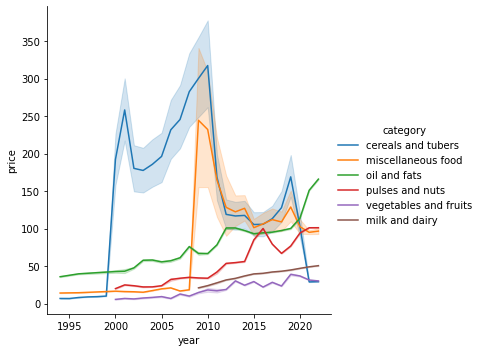

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(180,180))
sns.relplot( x = "year",
            y = "price",
            hue = "category",
            kind="line",
             data = df)
plt.show()

In [ ]:
df['category'].unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'milk and dairy'],
      dtype=object)

In [ ]:
for i  in ["category"]:
   df= pd.get_dummies(df,columns=[i],drop_first=  False)

In [ ]:

df.columns

Index(['state', 'district', 'market', 'latitude', 'longitude', 'commodity',
       'unit', 'priceflag', 'price', 'year', 'month',
       'category_cereals and tubers', 'category_milk and dairy',
       'category_miscellaneous food', 'category_oil and fats',
       'category_pulses and nuts', 'category_vegetables and fruits'],
      dtype='object')

In [ ]:
df.dtypes

state                             object
district                          object
market                            object
latitude                          object
longitude                         object
commodity                         object
unit                              object
priceflag                         object
price                              int64
year                               int64
month                              int64
category_cereals and tubers        uint8
category_milk and dairy            uint8
category_miscellaneous food        uint8
category_oil and fats              uint8
category_pulses and nuts           uint8
category_vegetables and fruits     uint8
dtype: object

In [ ]:
columns=["longitude","latitude"]
for i in columns:
  df[i]=df[i].astype("float")

In [ ]:
df.dtypes

state                              object
district                           object
market                             object
latitude                          float64
longitude                         float64
commodity                          object
unit                               object
priceflag                          object
price                               int64
year                                int64
month                               int64
category_cereals and tubers         uint8
category_milk and dairy             uint8
category_miscellaneous food         uint8
category_oil and fats               uint8
category_pulses and nuts            uint8
category_vegetables and fruits      uint8
dtype: object

In [ ]:
X=df.drop(labels='price',axis=1)
Y=df['price']

In [ ]:
X.shape

(164551, 16)

In [ ]:
df.head(5)

,state,district,market,latitude,longitude,commodity,unit,priceflag,price,year,month,category_cereals and tubers,category_milk and dairy,category_miscellaneous food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits
0,Delhi,Delhi,Delhi,28.666667,77.216667,Rice,KG,actual,8,1994,1,1,0,0,0,0,0
1,Delhi,Delhi,Delhi,28.666667,77.216667,Wheat,KG,actual,5,1994,1,1,0,0,0,0,0
2,Delhi,Delhi,Delhi,28.666667,77.216667,Sugar,KG,actual,13,1994,1,0,0,1,0,0,0
3,Delhi,Delhi,Delhi,28.666667,77.216667,Oil (mustard),KG,actual,31,1994,1,0,0,0,1,0,0
4,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,Rice,KG,actual,6,1994,1,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["state_cat"] = lb_make.fit_transform(df["state"])

In [ ]:
df.head(5)

,state,district,market,latitude,longitude,commodity,unit,priceflag,price,year,month,category_cereals and tubers,category_milk and dairy,category_miscellaneous food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits,state_cat
0,Delhi,Delhi,Delhi,28.666667,77.216667,Rice,KG,actual,8,1994,1,1,0,0,0,0,0,6
1,Delhi,Delhi,Delhi,28.666667,77.216667,Wheat,KG,actual,5,1994,1,1,0,0,0,0,0,6
2,Delhi,Delhi,Delhi,28.666667,77.216667,Sugar,KG,actual,13,1994,1,0,0,1,0,0,0,6
3,Delhi,Delhi,Delhi,28.666667,77.216667,Oil (mustard),KG,actual,31,1994,1,0,0,0,1,0,0,6
4,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,Rice,KG,actual,6,1994,1,1,0,0,0,0,0,8


In [ ]:
df[['state','state_cat']]

,state,state_cat
0,Delhi,6
1,Delhi,6
2,Delhi,6
3,Delhi,6
4,Gujarat,8
...,...,...
164546,West Bengal,30
164547,West Bengal,30
164548,West Bengal,30
164549,West Bengal,30


In [ ]:
df.drop(columns=["state"],axis=1,inplace=True)
df.head()

,district,market,latitude,longitude,commodity,unit,priceflag,price,year,month,category_cereals and tubers,category_milk and dairy,category_miscellaneous food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits,state_cat
0,Delhi,Delhi,28.666667,77.216667,Rice,KG,actual,8,1994,1,1,0,0,0,0,0,6
1,Delhi,Delhi,28.666667,77.216667,Wheat,KG,actual,5,1994,1,1,0,0,0,0,0,6
2,Delhi,Delhi,28.666667,77.216667,Sugar,KG,actual,13,1994,1,0,0,1,0,0,0,6
3,Delhi,Delhi,28.666667,77.216667,Oil (mustard),KG,actual,31,1994,1,0,0,0,1,0,0,6
4,Ahmadabad,Ahmedabad,23.033333,72.616667,Rice,KG,actual,6,1994,1,1,0,0,0,0,0,8


In [ ]:
print("district",":",len(df["district"].unique()),'labels')

district : 158 labels


In [ ]:
one=[x for x in df.columns if df[x].dtypes=="O"]

In [ ]:
for i in one:
    print("{} :".format(i),df[i].nunique())

district : 158
market : 164
commodity : 23
unit : 3
priceflag : 1


In [ ]:
for i  in ["district","market"]:
   df= pd.get_dummies(df,columns=[i],drop_first=True)

In [ ]:
one=[x for x in df.columns if df[x].dtypes=="uint8"]

In [ ]:
for i in one:
  df[i]=df[i].astype("int64")

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder() 
for i in ["commodity","unit","priceflag"]:
    df[i]=label_encoder.fit_transform(df[i])

In [ ]:
df["price"]=df["price"].astype("float")

In [ ]:
X=df.drop(labels='price',axis=1)

In [ ]:
Y=df.loc[:,['price']]

In [ ]:
X

,latitude,longitude,commodity,unit,priceflag,year,month,category_cereals and tubers,category_milk and dairy,category_miscellaneous food,...,market_Una,market_Vapi,market_Varanasi,market_Vellore,market_Vijayapur,market_Vijaywada,market_Visakhapatnam,market_Waghai,market_Warangal,market_Wayanad
0,28.666667,77.216667,15,1,0,1994,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.666667,77.216667,21,1,0,1994,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.666667,77.216667,17,1,0,1994,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,28.666667,77.216667,9,1,0,1994,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23.033333,72.616667,15,1,0,1994,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164546,22.339330,87.226720,3,1,0,2022,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164547,22.339330,87.226720,4,1,0,2022,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164548,22.339330,87.226720,5,1,0,2022,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164549,22.339330,87.226720,13,1,0,2022,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
start=np.where(X["year"]==2022)
print(start[0][0])
x_test=X.iloc[start[0][0]:,]
y_test=Y.iloc[start[0][0]:,]
X.drop(np.squeeze(start),axis=0,inplace=True)
Y.drop(np.squeeze(start),axis=0,inplace=True)


148301


In [ ]:
x_test

,latitude,longitude,commodity,unit,priceflag,year,month,category_cereals and tubers,category_milk and dairy,category_miscellaneous food,...,market_Una,market_Vapi,market_Varanasi,market_Vellore,market_Vijayapur,market_Vijaywada,market_Visakhapatnam,market_Waghai,market_Warangal,market_Wayanad
148301,12.91310,92.89786,14,1,0,2022,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148302,12.91310,92.89786,15,1,0,2022,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148303,12.91310,92.89786,22,1,0,2022,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148304,12.91310,92.89786,7,2,0,2022,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
148305,12.91310,92.89786,16,1,0,2022,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164546,22.33933,87.22672,3,1,0,2022,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164547,22.33933,87.22672,4,1,0,2022,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164548,22.33933,87.22672,5,1,0,2022,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164549,22.33933,87.22672,13,1,0,2022,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test

,price
148301,40.0
148302,43.0
148303,57.0
148304,66.0
148305,18.0
...,...
164546,104.0
164547,111.0
164548,100.0
164549,26.0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt 

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
fs.fit_transform(X, Y)

feat_importances = pd.Series(fs.pvalues_, index=X.columns)
print(feat_importances.nlargest(150))
#feat_importances.nlargest(20)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


district_Katihar        0.997620
market_Katihar          0.997620
district_Kurnool        0.995629
market_Kurnool          0.995629
district_Valsad         0.989198
                          ...   
market_Muzzafarpur      0.561172
district_Mahbubnagar    0.534223
market_Jadcherla        0.534223
district_Durg           0.519889
market_Durg             0.519889
Length: 150, dtype: float64


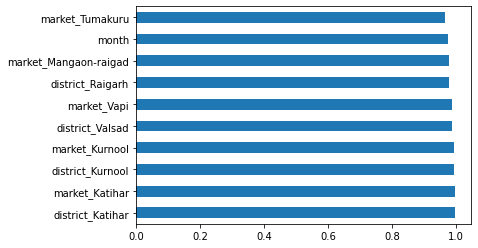

In [ ]:
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## X-G BOOST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=0) # no need of train test split

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
import xgboost as xg
model=xg.XGBRegressor(objective="reg:linear")
model.fit(X,Y)

[02:54:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
model.score(X,Y)    #train accuracy

0.9833993483653627

In [ ]:
from sklearn.metrics import r2_score
pred1=model.predict(x_test)     #test accuracy
r2_score(y_test,pred1) 

0.9823962314783369

In [ ]:
pred1

array([ 84.91348, 133.80083,  91.89254, ...,  38.8613 , 197.63951,
        34.4841 ], dtype=float32)

In [ ]:
y_test

,price
85931,62.69
142584,120.00
47620,81.85
84906,76.60
123893,9.46
...,...
129560,195.77
111126,114.37
82447,45.00
25590,260.00


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae_error = mae(y_test, pred1)
mae_error

13.208470668688678

## hyper parameter tuning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
model3=xg.XGBRegressor(objective="reg:linear")

In [ ]:
random_search=RandomizedSearchCV(model3,param_distributions=params,n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[03:41:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3}

In [ ]:
model=xg.XGBRegressor(objective="reg:linear",min_child_weight=3,max_depth=12,learning_rate=0.1,gamma=0.4,colsample_bytree=0.7)
model.fit(X,Y)                              ## change this values according to random_search.best_params_

[11:57:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, gamma=0.4, max_depth=12, min_child_weight=3)

In [ ]:
from sklearn.metrics import r2_score
pred1=model.predict(x_test)     #test accuracy
r2_score(y_test,pred1) 

0.9291205003228095

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae_error = mae(y_test, pred1)
mae_error

12.141848139806894

In [ ]:
y_test.reset_index(inplace = True)

In [ ]:
y_test.drop("index",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
result=pd.concat([pd.DataFrame(pred1,columns=["prediction"]), y_test],axis=1)

In [ ]:
result.rename(columns={"prediction":"pred_price","price":"actual_price"},inplace=True)

In [ ]:
result.head(15)

,pred_price,actual_price
0,42.915390,40.0
1,48.267754,43.0
2,56.048790,57.0
3,63.391579,66.0
4,15.833081,18.0
5,49.345673,53.0
6,65.881523,66.0
7,170.620667,243.0
8,130.228088,145.0
9,160.680893,160.0


## save the model

In [ ]:
import joblib

In [ ]:
filename = 'xgboost_model.sav'
joblib.dump(model, filename)

['xgboost_model.sav']

## load the model

In [ ]:
loaded_model = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)

[04:04:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
